Input shape: torch.Size([1, 1, 128, 128])
Output shape: torch.Size([1, 1, 128, 128])
Output shape after BatchNorm: torch.Size([1, 1, 128, 128])
Output shape after MaxPool: torch.Size([1, 1, 32, 32])


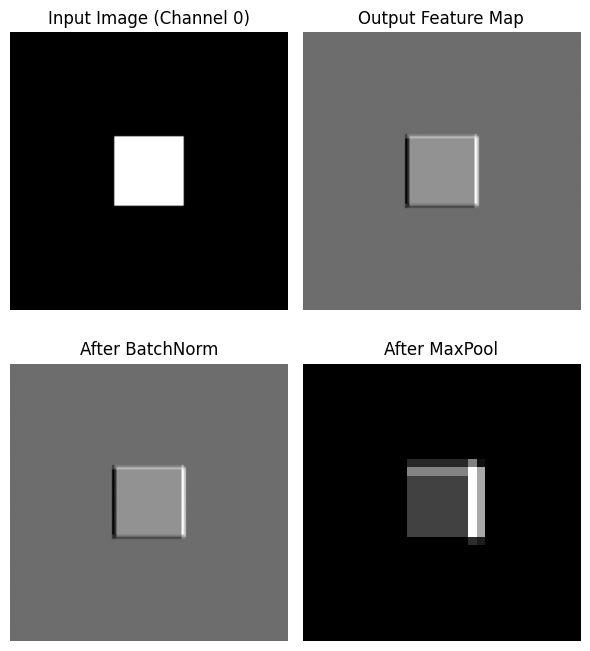

In [37]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Define a 2D Convolution layer
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1)
batch_layer = nn.BatchNorm2d(1)
max_pool_layer = nn.MaxPool2d(4)

# Create a tensor which is black everywhere but has a white square in the center of
W = 128
input_tensor = torch.zeros((1, 1, W, W))  # (batch_size, channels, height, width)
center = (W // 2, W // 2)
side_length = W // 4
for i in range(W):
    for j in range(W):
        if (
            center[0] - side_length // 2 <= i < center[0] + side_length // 2
            and center[1] - side_length // 2 <= j < center[1] + side_length // 2
        ):
            input_tensor[0, 0, i, j] = 1.0  # white square

# Apply the convolution
o1 = conv_layer(input_tensor)
o2 = batch_layer(o1)
o3 = max_pool_layer(o2)

print(f"Input shape: {input_tensor.shape}")
print(f"Output shape: {o1.shape}")
print(f"Output shape after BatchNorm: {o2.shape}")
print(f"Output shape after MaxPool: {o3.shape}")

# plot the original image and the output feature map
plt.figure(figsize=(6, 7))
plt.subplot(2, 2, 1)
plt.title("Input Image (Channel 0)")
plt.imshow(input_tensor[0, 0].detach().numpy(), cmap="gray")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.title("Output Feature Map")
plt.imshow(o1[0, 0].detach().numpy(), cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.subplot(2, 2, 3)
plt.imshow(o2[0, 0].detach().numpy(), cmap="gray")
plt.title("After BatchNorm")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(o3[0, 0].detach().numpy(), cmap="gray")
plt.title("After MaxPool")
plt.axis("off")
plt.show()

In [28]:
# print mean and std of o1 before batch norm and o2 after batch norm
print(f"Mean of o1 before BatchNorm: {o1.mean().item():.1f}")
print(f"Std of o1 before BatchNorm: {o1.std().item():.1f}")
print(f"Mean of o2 after BatchNorm: {o2.mean().item():.1f}")
print(f"Std of o2 after BatchNorm: {o2.std().item():.1f}")

Mean of o1 before BatchNorm: -0.2
Std of o1 before BatchNorm: 0.0
Mean of o2 after BatchNorm: -0.0
Std of o2 after BatchNorm: 1.0


In [26]:
o2

tensor([[[[-0.2224, -0.2224, -0.2224,  ..., -0.2224, -0.2224, -0.2224],
          [-0.2224, -0.2224, -0.2224,  ..., -0.2224, -0.2224, -0.2224],
          [-0.2224, -0.2224, -0.2224,  ..., -0.2224, -0.2224, -0.2224],
          ...,
          [-0.2224, -0.2224, -0.2224,  ..., -0.2224, -0.2224, -0.2224],
          [-0.2224, -0.2224, -0.2224,  ..., -0.2224, -0.2224, -0.2224],
          [-0.2224, -0.2224, -0.2224,  ..., -0.2224, -0.2224, -0.2224]]]],
       grad_fn=<NativeBatchNormBackward0>)